# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [60]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import pandas as pd

In [38]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [39]:
X.shape

(70000, 784)

In [41]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [42]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [43]:
import matplotlib.pyplot as plt

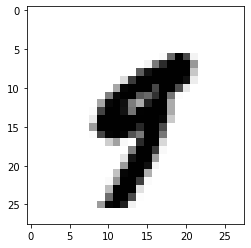

In [44]:
plt.imshow(X[36000].reshape(28, 28), interpolation='nearest', cmap='binary');

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [45]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [46]:
X_train = X[: 60000]

In [47]:
X_test = X[60000 :]

In [48]:
y_train = y[: 60000]

In [49]:
y_test = y[60000 :]

In [50]:
print(f"X_train shape = {X_train.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (60000, 784)
X_test shape = (10000, 784)
y_train shape = (60000,)
y_test shape = (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [51]:
y_train5 = (y_train == '5')
y_test5 = (y_test == '5')

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression(max_iter=2000, n_jobs=-1)
model.fit(X_train, y_train5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [54]:
model.predict(X[[36000]])

array([False])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [55]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [56]:
never_5_clf.fit(X_train, y_train5)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [57]:
y_pred_never5 = never_5_clf.predict(X_test)

In [61]:
pd.DataFrame(confusion_matrix(y_test5, y_pred_never5))

,0,1
0,9108,0
1,892,0


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [62]:
y_pred_5 = model.predict(X_test)

In [63]:
pd.DataFrame(confusion_matrix(y_test5, y_pred_5))

,0,1
0,9029,79
1,145,747


### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [64]:
from sklearn.metrics import roc_curve

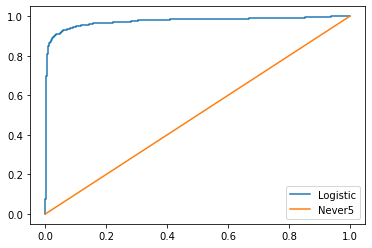

In [65]:
fpr, tpr, thresholds = roc_curve(y_test5, model.predict_proba(X_test)[:, 1], )
fpr_never5, tpr_never5, thresholds_never5 = roc_curve(y_test5, never_5_clf.predict(X_test))

plt.plot(fpr, tpr, label='Logistic')
plt.plot(fpr_never5, tpr_never5, label='Never5')
plt.legend()

### Now find the roc_auc_score for each. 

In [66]:
from sklearn.metrics import roc_auc_score

print(f"Logistic: {roc_auc_score(y_test5, model.predict_proba(X_test)[:,1])}")
print(f"Never 5: {roc_auc_score(y_test5, never_5_clf.predict(X_test))}")

Logistic: 0.9747610143155084
Never 5: 0.5


### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

In [67]:
from yellowbrick.classifier import ROCAUC

C:\Users\LIBRE\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


C:\Users\LIBRE\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


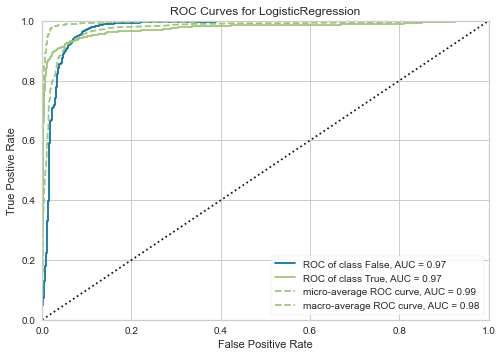

In [68]:
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train5)
visualizer.score(X_test, y_test5)
visualizer.show()

### What does this metric tell you? Which classifier works better with this metric in mind?